# Module 5: Pyber
Note: Technical Analysis Deliverable 1 & 2 are at the end of this notebook. All Module work is marked by [MW] in its markdown cell. While the Module Work is present within this notebook, their display function, such as plt.show() has been commented out as a way to condense cell space.

### [MW] Adding Matplotlib inline magic command, dependencies, and files to load

In [304]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


###  [MW] Creating DataFrames based on different types of cities and getting: 1. the number of rides, 2. average fare, and 3, average number of drivers for each city type

In [305]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

###  [MW] Creating Each City Type's Bubble Charts, Formatting the Bubble Charts and Legends

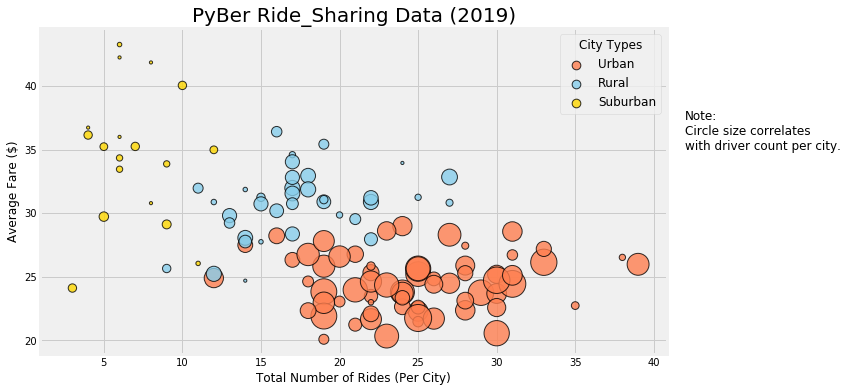

In [306]:
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1, alpha=0.8,label="Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")

plt.title("PyBer Ride_Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)",fontsize=12)
plt.legend()
plt.grid(True)

lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

plt.savefig("analysis/Fig1.png")
plt.show()

###  [MW] Summary Statistics for Number of Rides by City Type

In [307]:
mean_urban_ride_count = np.mean(urban_ride_count)
median_urban_ride_count = np.median(urban_ride_count)
mode_urban_ride_count = sts.mode(urban_ride_count)
mean_urban_fares = np.mean(urban_cities_df["fare"])
median_urban_fares = np.median(urban_cities_df["fare"])
mode_urban_fares = sts.mode(urban_cities_df["fare"])

mean_suburban_ride_count = np.mean(suburban_ride_count)
median_suburban_ride_count = np.median(suburban_ride_count)
mode_suburban_ride_count = sts.mode(suburban_ride_count)
mean_suburban_fares = np.mean(suburban_cities_df["fare"])
median_suburban_fares = np.median(suburban_cities_df["fare"])
mode_suburban_fares = sts.mode(suburban_cities_df["fare"])

mean_rural_ride_count = np.mean(rural_ride_count)
median_rural_ride_count = np.median(rural_ride_count)
mode_rural_ride_count = sts.mode(rural_ride_count)
mean_rural_fares = np.mean(rural_cities_df["fare"])
median_rural_fares = np.median(rural_cities_df["fare"])
mode_rural_fares = sts.mode(rural_cities_df["fare"])

###  [MW] Creating Box-and-Whisker Plots for ride counts

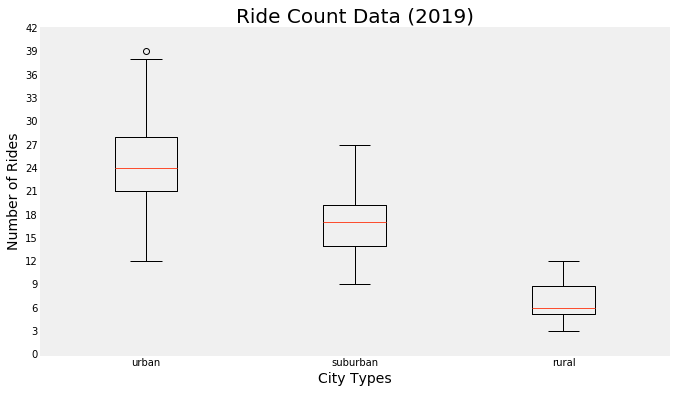

In [308]:
x_labels = ["urban", "suburban", "rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

plt.savefig("Analysis/Fig2.png")
plt.show()

In [309]:
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]

###  [MW] Creating a box-and_whisker plots for Ride Fares

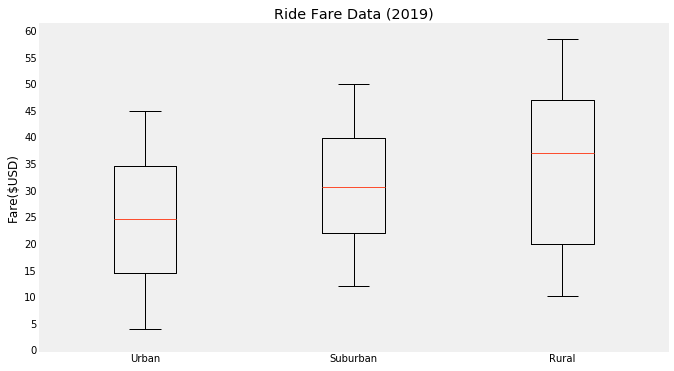

<Figure size 432x288 with 0 Axes>

In [310]:
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

x_labels = ["Urban", "Suburban", "Rural"]
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fares_data, labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
plt.show()

plt.savefig("Analysis/Fig3.png")
# print("Summary Statistics")
# urban_fares.describe()

###  [MW] Creating the box-and-whisker plot for the urban driver count data

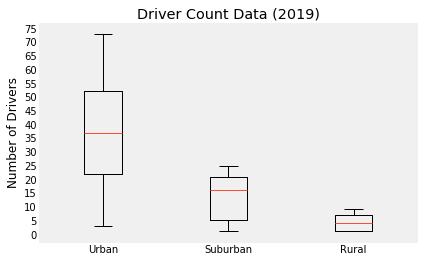

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

<Figure size 432x288 with 0 Axes>

In [311]:
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots()
ax.boxplot(drivers_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()
plt.show()

plt.savefig("Analysis/Fig4.png")

print("Summary Statistics")
urban_drivers.describe()

###  [MW] Getting the Percentage of Fares and Creating a Pie Chart by City Type

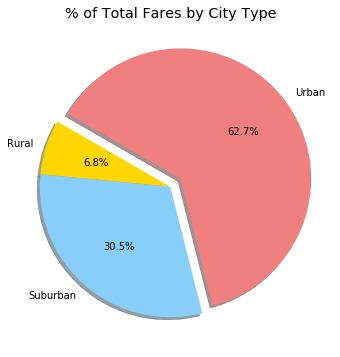

In [312]:
sum_fares_by_type = pyber_data_df.groupby("type").sum()["fare"]
total_fares = pyber_data_df.sum()["fare"]
type_percents = sum_fares_by_type / total_fares * 100

plt.subplots(figsize=(10,6))
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"], colors=['gold','lightskyblue','lightcoral'], explode=[0,0,0.1], shadow=True, startangle=150, autopct="%1.1f%%")
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14

plt.savefig("Analysis/Fig5.png")
plt.show()

###  [MW] Getting the Percentage of Rides and Creating a Pie Chart by City Type

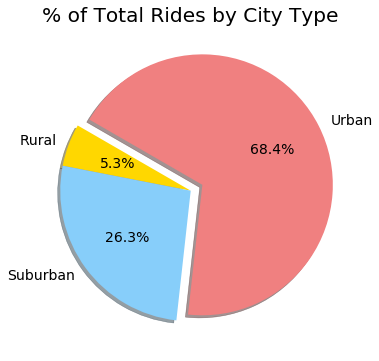

In [313]:
ride_percents = 100* pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df.count()["ride_id"]

plt.subplots(figsize=(10,6))
plt.pie(ride_percents, labels=["Rural", "Suburban", "Urban"], colors=["gold", 'lightskyblue', 'lightcoral'], explode=[0,0,0.1], autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
mpl.rcParams["font.size"] = 14

plt.savefig("Analysis/Fig6.png")
plt.show()

###  [MW] Getting the Percentage of Drivers and Creating a Pie Chart by City Type

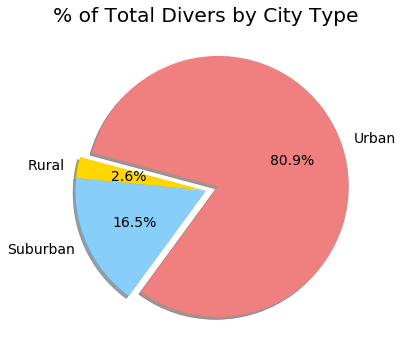

In [314]:
driver_percents = 100* city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df.sum()["driver_count"]

plt.subplots(figsize=(10,6))
plt.pie(driver_percents, labels=["Rural", "Suburban", "Urban"], colors=["gold","lightskyblue",'lightcoral'], explode=[0, 0, 0.1], autopct="%1.1f%%", shadow=True, startangle=165)
plt.title("% of Total Divers by City Type")
mpl.rcParams["font.size"] = 14

plt.savefig("Analysis/Fig7.png")
plt.show()

## Technical Analysis Deliverable 1:  Summary of Key Metrics for the ride_sharing data by city type

### Generating Variables such as Total Rides/Drivers/Fares and Average Fare per ride/driver into a dataframe

In [315]:
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

ave_fare_per_ride = total_fares / total_rides
ave_fare_per_driver = total_fares / total_drivers


summary_df = pd.DataFrame({"Total Rides":total_rides, 
                           "Total Drivers":total_drivers, 
                           "Total Fares":total_fares, 
                           "Average Fare per Ride":ave_fare_per_ride,
                          "Average Fare per Driver":ave_fare_per_driver})

summary_df.index.name = None
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Technical Analysis Deliverable 2:: Multi-line chart on sum of the fares for each city type

### Renaming Columns, Setting the Index to the Date Column, Copying the Previously Merged pyber_data_df, and creating a new dataframe with only 'City Type', and 'Fare'

In [316]:
pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})             
pyber_data_df.set_index('date')

# citydate = pyber_data_df['date']
cityfare = pyber_data_df['fare']
citytype = pyber_data_df['type']

#     'date': citydate,

citynfare_df = pd.DataFrame({

    "City Type": citytype,
    "Fares":cityfare
})

citynfare_df.index = pd.to_datetime(pyber_data_df['date'])
citynfare_df.head(10)

,City Type,Fares
date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
2019-03-11 12:26:48,Urban,9.52
2019-02-27 11:17:56,Urban,43.25
2019-04-26 00:43:24,Urban,35.98
2019-01-08 03:28:48,Urban,35.09


### Creating a new DataFrame that only includes 'City Type' and 'Fare', which also includes the sume of fares by the type of city and date

In [317]:
fare_by_type = pd.DataFrame(citynfare_df.groupby(['date', 'City Type']).sum())
# fare_by_date = citynfare_df.groupby([]).sum()

# fares_df = pd.DataFrame({"City Type":fare_by_type, "Date": fare_by_date})
pivot_table_df = pd.pivot_table(fare_by_type, index='date', columns='City Type')
pivot_table_df.head(10)

Fares                
City Type            Rural Suburban  Urban
date                                      
2019-01-01 00:08:16    NaN      NaN  37.91
2019-01-01 00:46:46    NaN    47.74    NaN
2019-01-01 02:07:24    NaN    24.07    NaN
2019-01-01 03:46:50    NaN      NaN   7.57
2019-01-01 05:23:21    NaN      NaN  10.75
2019-01-01 09:45:36  43.69      NaN    NaN
2019-01-01 12:32:48    NaN    25.56    NaN
2019-01-01 14:40:14    NaN      NaN   5.42
2019-01-01 14:42:25    NaN      NaN  12.31
2019-01-01 14:52:06    NaN    31.15    NaN

### Using the .loc to sort a new dataframe that is from Jan to April of 2019. Also uses resample() function by week inorder to create weekly time series

In [318]:
jan_april_df = pivot_table_df.loc['2019-01-01':'2019-04-28']
resampled_df = jan_april_df.resample("W").sum()
resampled_df.head(10)

Fares                  
City Type    Rural Suburban    Urban
date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93

### Using the object-oriented interface method, plots the Dataframe previously created

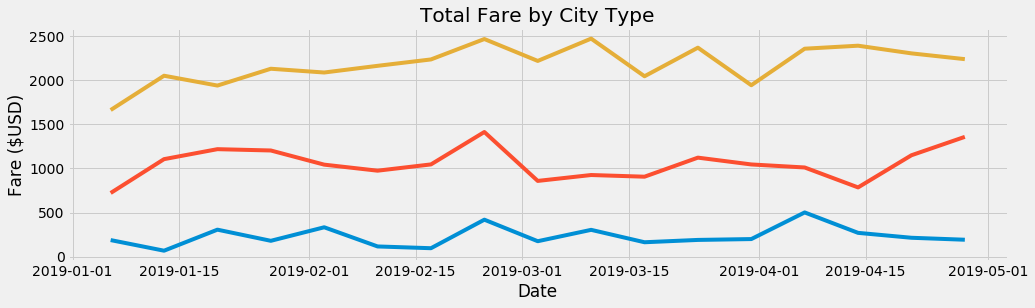

In [319]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(resampled_df)
ax.set_title("Total Fare by City Type")
ax.set_xlabel("Date")
ax.set_ylabel("Fare ($USD)")
plt.savefig("Analysis/Fig8_Challenge_Delieverable.png")

plt.show()

